# The Best Neighborhood in Pittsburgh
## Authors
### Team: USB-Cs
- Shinwoo Kim — SHK148@pitt.edu
- Kavin Sankar — KAS595@pitt.edu
- Jonathan Ryu JHR25@pitt.edu

## Metric
We decided a good way to determine which neighborhood is the best is to identify which has neighborhood was the safest and had the best quality homes. To do this, we utilized [**Pittsburgh Police Arrest Data**](https://data.wprdc.org/dataset/arrest-data), [**Pittsburgh Police Firearm Seizures**](https://data.wprdc.org/dataset/pbp-fire-arm-seizures), and [**Median Home Values**](https://data.wprdc.org/dataset/pgh/resource/9890875b-c1d1-4e64-8fc9-a4a8dc433745). We chose our metric to be that the higher amount of crimes committed (total amount of arrests and gun seizures) would result in a more dangerous neighborhood; the median home values were pretty straight forward. The best neighborhood would be tghe safest and have the best homes.

## Method

In [1]:
# load numpy, pandas, seaborn, matplotlib, geopandas, descartes, geometry
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

The above code cell loads in the libraries needed for this Notebook.

### Arrests

In [2]:
# load data from data set
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f") 

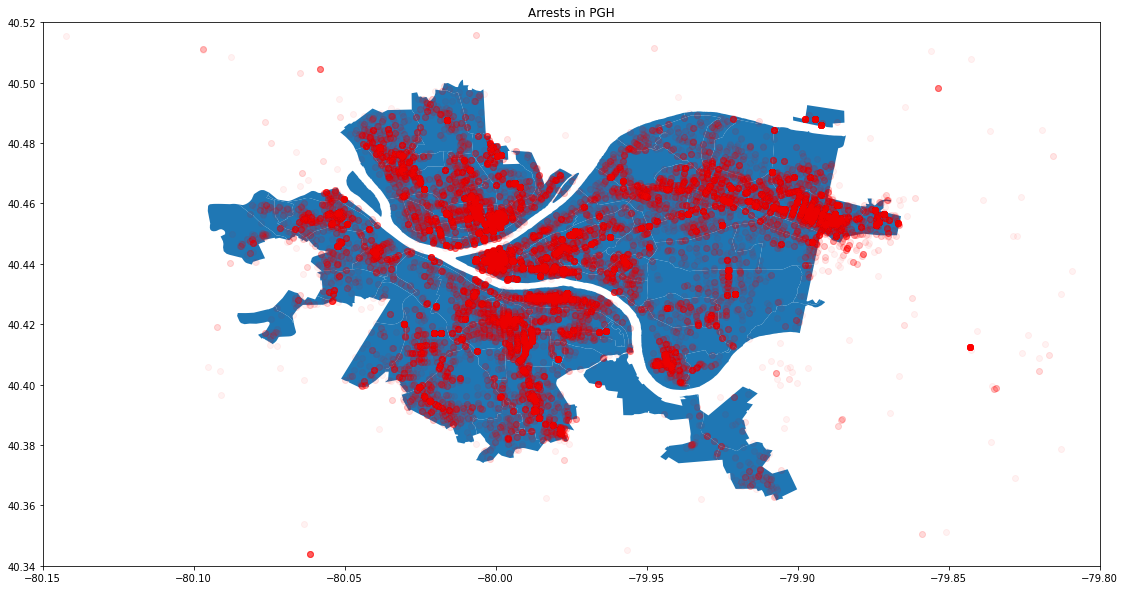

In [6]:
# load data from data set
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f") 
#import map of Pittsburgh
#source: https://spcgis-spc.hub.arcgis.com/datasets/city-of-pittsburgh-neighborhoods/explore?location=40.430850%2C-79.979850%2C12.73
pgh = gpd.read_file('./pgh/City_of_Pittsburgh_Neighborhoods.shp')
geometry = [Point(xy) for xy in zip(arrests['X'], arrests['Y'])]
geo_df = gpd.GeoDataFrame(arrests, geometry = geometry)
fig, ax = plt.subplots(figsize = (20,10))
pgh.plot(ax=ax)
plt.xlim([-80.15, -79.80])
plt.ylim([40.34,40.52])
ax.set_title('Arrests in PGH')
geo_df.plot(ax=ax, alpha = .05, color='red')
plt.show()

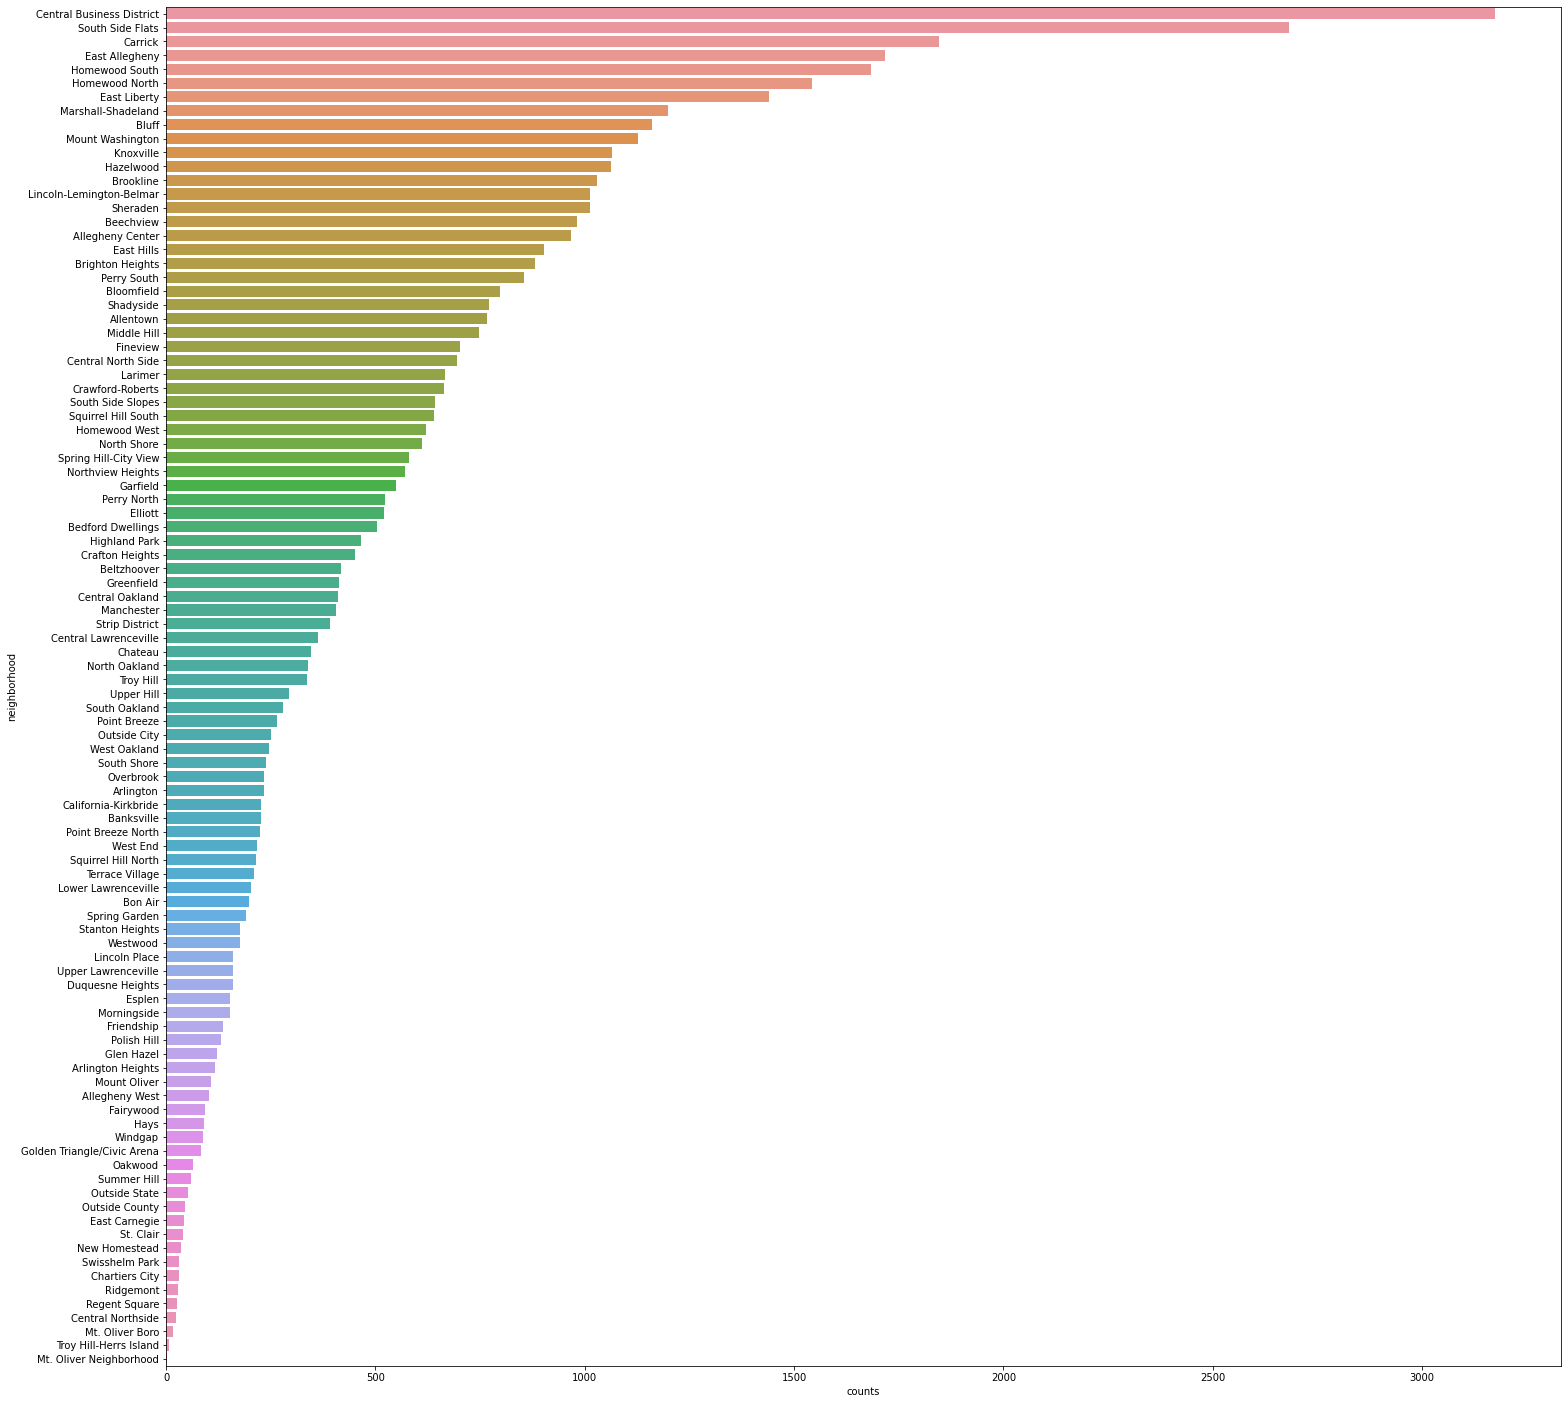

In [7]:
#Count number of crimes in each neighborhood and display as bar chart
tally = arrests['INCIDENTNEIGHBORHOOD'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
tally.sort_values(by='counts', ascending=True)
#print(tally.plot.bar(x='neighborhood', y='counts', figsize=(25,2), width=0.5, position=1, fontsize=14))
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = "counts", 
            y = "neighborhood", 
            ax=ax, 
            data=tally, 
            orient="h", 
            order=tally.sort_values('counts', ascending = False).neighborhood)

In [8]:
print("Neighborhood with least amount of arrests: \n ",tally.nsmallest(5, ['counts']))

Neighborhood with least amount of arrests: 
                 neighborhood  counts
97  Mt. Oliver Neighborhood       2
96   Troy Hill-Herrs Island       6
95          Mt. Oliver Boro      17
94        Central Northside      23
93            Regent Square      27


---
### Gun Seizures

---
### Median Home Values

---
## Conclusion